# Chapter 14. Trees and Forests

## 14.0 Introduction
## 14.1 Training a Decision Tree Classifier

* Scikit-learn's DecisionTreeClassifier

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

# Load Data
iris = datasets.load_iris()
features = iris.data
target = iris.target

decisiontree = DecisionTreeClassifier(random_state=0)

# Train model
model = decisiontree.fit(features, target)

In [11]:
# Make a new obs
observation = [[ 5, 4, 3, 2]]

# Predict obs's class
model.predict(observation)

array([1])

In [12]:
model.predict_proba(observation)

array([[0., 1., 0.]])

In [15]:
# Create decision tree classifier object using entropy
decisiontree_entropy = DecisionTreeClassifier(
    criterion='entropy', random_state=0
)

model_entorpy = decisiontree_entropy.fit(features, target)

## 14.2 Training a Decision Tree Regressor


In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets

boston = datasets.load_boston()
features = boston.data[:, 0:2]
target = boston.target

decisiontree = DecisionTreeRegressor(random_state=0)

model = decisiontree.fit(features, target)


In [18]:
# Make a new observation
observation = [[0.02, 16]]

# Predict observation's value
model.predict(observation)

array([33.])

## 14.3 Visualizing a Decision Tree Model

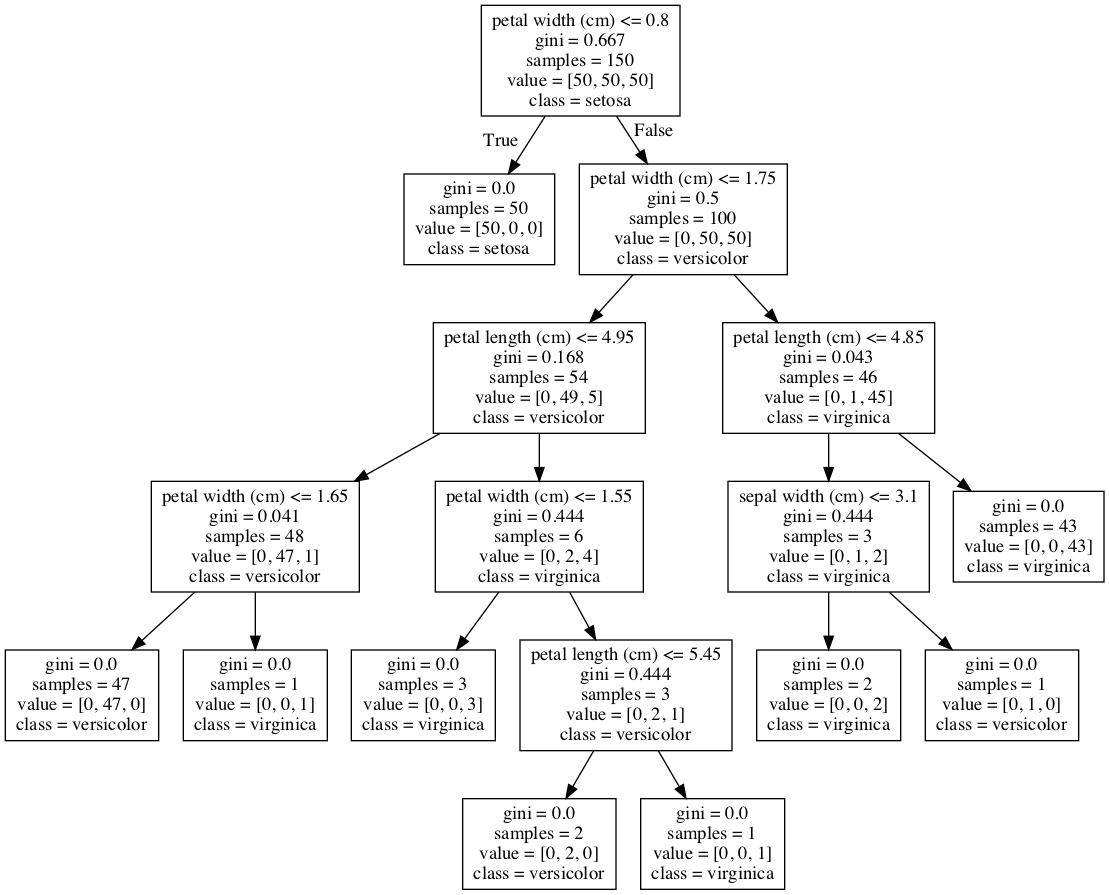

In [4]:
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree

iris = datasets.load_iris()
features = iris.data
target = iris.target

decisiontree = DecisionTreeClassifier(random_state=0)

model = decisiontree.fit(features, target)

dot_data = tree.export_graphviz(decisiontree,
out_file=None,
feature_names=iris.feature_names,
class_names=iris.target_names)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [5]:
# Create PDF
graph.write_pdf("iris.pdf")

True

In [6]:
# Create PNG
graph.write_png("iris.png")

True

## 14.4 Training a Random Forest Classifier

* "forest" of randomized decision trees

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets


iris = datasets.load_iris()
features = iris.data
target = iris.target

randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

model =randomforest.fit(features, target)

In [8]:
observation = [[5,4,3,2]]

model.predict(observation)

array([1])

In [9]:
randomforest_entropy = RandomForestClassifier(
    criterion='entropy', random_state=0
)

model_entropy = randomforest_entropy.fit(features, target)

## 14.5 Training a Random Forest Regressor

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets

boston = datasets.load_boston()
features = boston.data[:, 0:2]
target = boston.target

randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)

model = randomforest.fit(features, target)

## 14.6 Identifying important features in random forests

* To know which features are most important in RF models.

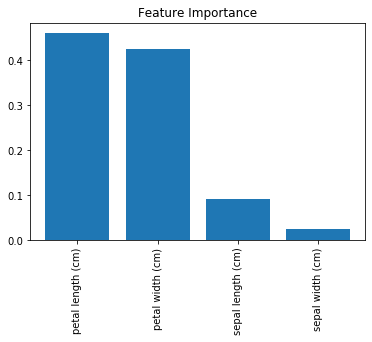

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

iris = datasets.load_iris()
features = iris.data
target = iris.target

randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

model =randomforest.fit(features, target)

importances = model.feature_importances_

# 내림차순으로 변수 중요도를 정렬한다. 기본은 오름차순이다.
indices = np.argsort(importances)[::-1]

names = [iris.feature_names[i] for i in indices]

plt.figure()

plt.title("Feature Importance")

plt.bar(range(features.shape[1]), importances[indices])

plt.xticks(range(features.shape[1]), names, rotation=90)

plt.show()

In [17]:
# View feature importances
model.feature_importances_

array([0.09090795, 0.02453104, 0.46044474, 0.42411627])

## 14.7 Selecting Important Features in Random Forests

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel


iris = datasets.load_iris()
features = iris.data
target = iris.target

randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

selector = SelectFromModel(randomforest, threshold=0.3)

features_important = selector.fit_transform(features, target)

model = randomforest.fit(features_important, target)


## 14.8 Handling Imbalanced Classes
* Imbalanced classes and train a RF model
* class_weight = "balanced" (decision tree and random forest)

In [19]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

iris = datasets.load_iris()
features = iris.data
target = iris.target

# 클래스를 매우 높게 불균형하도록 조작한다. 첫 40개 관측치를 제거한다.
features = features[40:, :]
target = target[40:]

target = np.where((target==0), 0, 1)

randomforest = RandomForestClassifier(
    random_state=0, n_jobs=-1, class_weight="balanced"
)

# Train model
model =randomforest.fit(features, target)

In [20]:
# weight 계산
110/(2*10)

5.5

In [22]:
# 더 큰 클래스의 가중치
110/(2*100)

0.55

## 14.9 Controlling Tree Size
* 구조와 크기를 수동으로 변경한다.

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

iris = datasets.load_iris()
features = iris.data
target = iris.target

decisiontree = DecisionTreeClassifier(
    random_state=0,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0,
    max_leaf_nodes=None,
    min_impurity_decrease=0
)

model = decisiontree.fit(features, target)

## 14.10 Improving Performance Through Boosting

* AdaBoostClassifier or AdaBoostRegressor

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

iris = datasets.load_iris()
features = iris.data
target = iris.target

adaboost = AdaBoostClassifier(random_state=0)

model = adaboost.fit(features, target)

## 14.11 Evaluating Random Forests with Out-of-Bag Errors

* Evaluating a RF model without using CV.
* model's out-of-bag score

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

iris = datasets.load_iris()
features = iris.data
target = iris.target

randomforest = RandomForestClassifier(
    random_state=0, n_estimators = 1000, oob_score=True, n_jobs=-1
)

model = randomforest.fit(features, target)

randomforest.oob_score_

0.9533333333333334